[PHREEQC](http://wwwbrr.cr.usgs.gov/projects/GWC_coupled/phreeqc/index.html) -- __[phreeqpy](http://www.phreeqpy.com)__ example. Taken directly from a Python example (section 3.2, Table 3) in Charlton & Parkhurst (2011), which _compares gypsum solubility for WATEQ4F and Pitzer databases_. Compiled and run on Linux Ubuntu 64bit. [Emilio Mayorga](https://gist.github.com/emiliom), 12/8/2013

  * Charlton, S. R., Parkhurst, D. L. 2011. Modules based on the geochemical model PHREEQC for use in scripting and programming languages. _Computers & Geosciences_ 37 (10), 1653-1663. http://dx.doi.org/10.1016/j.cageo.2011.02.005
  * [phreeqpy ](http://www.phreeqpy.com)

In [1]:
import os
import phreeqpy.iphreeqc.phreeqc_dll as phreeqc_mod
import matplotlib.pyplot as plt

In [2]:
# path for .dat files
datpath = "/home/brandon/Downloads/iphreeqc-3.4.0-12927/examples/com/python"

In [3]:
def selected_array(db_path, input_string):
    """Load database via linked library object and run input string.
    May be more conventional to use variable name 'phreeqc' instead of 'dbase'.
    """
    dbase = phreeqc_mod.IPhreeqc('/usr/local/lib/libiphreeqc.so')
    dbase.load_database(db_path)
    dbase.run_string(input_string)
    return dbase.get_selected_output_array()

In [12]:
# Reaction configuration
input_string = """
    SOLUTION 1
    END
    INCREMENTAL_REACTIONS
    REACTION
        NaCl 1.0
        0 60*0.1 moles
    EQUILIBRIUM_PHASES
        Gypsum
    USE solution 1
    SELECTED_OUTPUT
        -reset false
        -total Na S(6)
    END"""

In [13]:
# Get results for different databases
wateq4f_result = selected_array(os.path.join(datpath, 'wateq4f.dat'), input_string)
pitzer_result  = selected_array(os.path.join(datpath, 'pitzer.dat'), input_string)
# Get data from the arrays.
nacl_conc      = [entry[0] for entry in wateq4f_result][1:]
wateq4f_values = [entry[1] for entry in wateq4f_result][1:]
pitzer_values  = [entry[1] for entry in pitzer_result][1:]

In [14]:
wateq4f_values

[0.015649756393342193,
 0.02196618860422608,
 0.025841408775123163,
 0.028805377040004448,
 0.03122144312988203,
 0.03325240743624757,
 0.03498984345367875,
 0.03649218631157961,
 0.03779988962315772,
 0.03894260638583739,
 0.03994301228322175,
 0.04081902071816426,
 0.04158515127291307,
 0.042253419222998516,
 0.042833938081907406,
 0.0433353419710134,
 0.04376509037346027,
 0.04412969353581418,
 0.04443488279388351,
 0.04468574172211632,
 0.04488680880583797,
 0.045042159015332685,
 0.04515546947958666,
 0.045230072992222425,
 0.04526900207637505,
 0.045275025631717127,
 0.04525067968619225,
 0.04519829341313292,
 0.04512001130910284,
 0.04501781223068333,
 0.044893525840208594,
 0.04474884689775945,
 0.04458534775014039,
 0.044404489300409515,
 0.044207630688962336,
 0.043996037875683576,
 0.04377089127967711,
 0.04353329260663496,
 0.04328427097256116,
 0.04302478841523151,
 0.04275574487059859,
 0.04247798267970446,
 0.04219229068203278,
 0.04189940794323102,
 0.04160002715845029,

Text(0.5, 0, 'NaCl, moles/(kg water)')

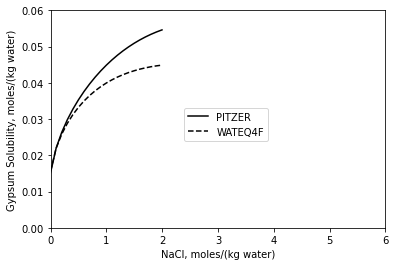

In [11]:
# Plot
plt.plot(nacl_conc, pitzer_values, 'k', nacl_conc, wateq4f_values,'k--')
plt.axis([0, 6, 0, .06])
plt.legend(('PITZER','WATEQ4F'), loc = (0.4, 0.4))
plt.ylabel('Gypsum Solubility, moles/(kg water)')
plt.xlabel('NaCl, moles/(kg water)')